# 02: Cross-validation with other tree algorithms

In [1]:
import pandas as pd
df = pd.read_csv("./data/winequality-red.csv")

In [2]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the data frame
# sample()メソッドに引数frac=1を指定すると、ランダムサンプリングをすることができる。
# reset_index()でインデックスを連番に振り直し
# 元のindexを削除: 引数drop
# 引数dropをTrueとすると、元のindexは削除され残らない。
df = df.sample(frac = 1).reset_index(drop = True)

In [3]:
# top 1000 rows are selected 
# for training 
df_train = df.head(1000) 

In [4]:
# bottom 599 values are selected 
# for testing/validation 
df_test = df.tail(599) 

In [5]:
# import matplotlib and seaborn 
# for plotting 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
# this is our global size of label text 
# on the plots 
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  

In [7]:
# This line ensures that the plot is displayed 
# inside the notebook 
%matplotlib inline 

In [8]:
# columns/features for training 
# note that, this can be done outside  
# the loop 
cols = [ 
        'fixed acidity',  
        'volatile acidity', 
        'citric acid',  
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide',  
        'total sulfur dioxide', 
        'density', 
        'pH',  
        'sulphates', 
        'alcohol'
        ] 

In [9]:
# function to create two plots using matplotlib and seaborn 

def plot_overfitting(train_accuracies, test_accuracies):
    plt.figure(figsize=(10, 5)) 
    sns.set_style("whitegrid") 
    plt.plot(train_accuracies, label="train accuracy") 
    plt.plot(test_accuracies, label="test accuracy") 
    plt.legend(loc="upper left", prop={'size': 15}) 
    plt.xticks(range(0, 26, 5)) 
    plt.xlabel("max_depth", size=20) 
    plt.ylabel("accuracy", size=20) 
    plt.show() 

## Overfitting with Random Forest

In [10]:
# import scikit-learn tree and metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

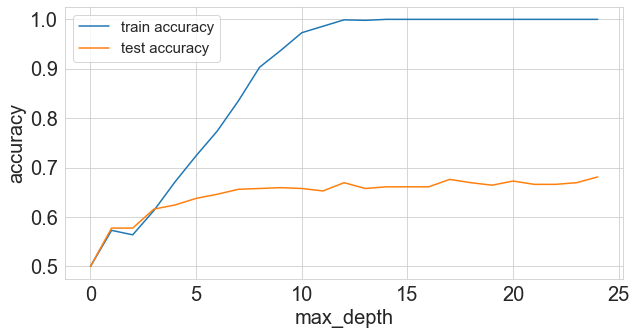

Wall time: 6.2 s


In [11]:
%%time
# to calculate the processing time of this cell
# only valid for Jupyter notebook

# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    #clf = tree.DecisionTreeClassifier(max_depth=depth) 
    clf = RandomForestClassifier(max_depth=depth)
 
    # fit the model on given features 
    clf.fit(df_train[cols], df_train.quality) 
    
    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols]) 
    
    # calculate training & test accuracies 
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    ) 
    
    # append accuracies 
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)  

plot_overfitting(train_accuracies, test_accuracies)

## Overfitting with Gradient Boost

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

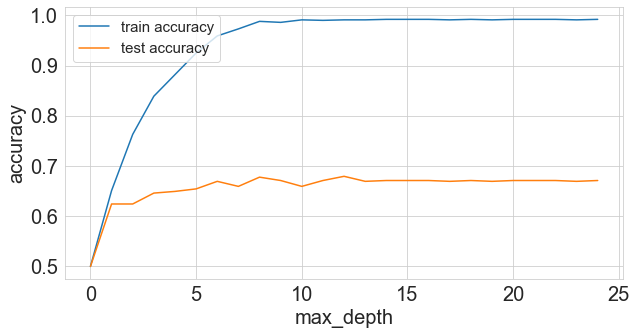

Wall time: 44.8 s


In [13]:
%%time
train_accuracies = [0.5] 
test_accuracies = [0.5] 
for depth in range(1, 25): 
    clf = GradientBoostingClassifier(max_depth=depth, min_samples_leaf=55, n_estimators=100)
    clf.fit(df_train[cols], df_train.quality) 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols]) 
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    ) 
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)  
plot_overfitting(train_accuracies, test_accuracies)